In [14]:
from Loss_function2 import loss_function
from function_evaluation2 import func_and_deriv
import numpy as np
from qiskit_algorithms.optimizers import ADAM, L_BFGS_B, COBYLA
import time

In [15]:
#Set seed:
RANDOM_STATE = 42
seed = np.random.seed(RANDOM_STATE)

#Define parameters
epochs = 10
shots_simulator = 1024 #number simulator runs
num_qubits = 6 #number of qubits
l = 5 #depth of variational circuit
init_theta = 2*np.pi*np.random.random(num_qubits*l*3)
x = np.linspace(0,0.9,20) #grid points

In [16]:
losses = []
theta = init_theta
for i in range(epochs):
    
    print("epoch number = ", i)
    
    loss = loss_function(x,num_qubits,l,theta,shots_simulator)
    print("Current loss:", loss)
    losses.append(loss)

    objective_function = lambda theta: loss_function(x,num_qubits,l,theta,shots_simulator)
    print()
    print("Starting optimizer now!")
    optimizer = COBYLA(maxiter=250) #250?
    start = time.time()
    theta_opt = optimizer.minimize(objective_function,theta).x
    end = time.time()
    print("Finished optimizing.")
    print("Costs ", end-start, "seconds.")

    if i == 0:
        print(theta_opt)

    theta = theta_opt

epoch number =  0
Current loss: 39.88929241280515

Starting optimizer now!
Finished optimizing.
Costs  768.6854577064514 seconds.
[2.35330497 5.97351416 5.59925358 3.76148219 0.98029403 1.98014248
 0.3649501  5.44234523 3.77691701 5.44895122 0.12933619 6.09412333
 5.23039137 1.33416598 1.14243996 1.15236452 1.91161039 3.2971419
 2.71399059 1.82984665 4.84438512 0.87646578 1.83559896 2.30191935
 2.86557222 4.93340606 1.25458737 3.23103027 3.72225051 0.29185655
 3.81731689 1.07143467 0.40873121 5.96202367 6.067245   5.07931034
 1.91394476 0.61369199 4.2991629  2.76555968 0.76678884 3.11128829
 0.21606945 5.71342859 1.62596258 5.16275028 1.95853845 3.26768375
 3.43508199 1.1614748  7.09207989 4.87030317 5.90304595 5.62236606
 3.75671636 5.79230665 0.55601479 1.23139664 0.28417144 2.04411075
 2.44213144 1.70493625 6.20711134 2.24154726 1.76516358 3.40986006
 0.88545302 5.04035228 0.46841551 6.2007935  4.85215699 2.24856745
 0.03469649 5.12369527 4.44131568 4.58048713 4.84603451 0.46523627


In [17]:
print(losses)

[39.88929241280515, 0.728395163500471, 0.9734565134915775, 0.2614494932398417, 0.6218088985204396, 0.6472214107933131, 1.6984310449660647, 1.3724386699988718, 1.7292040031496085, 0.8868545011826094]


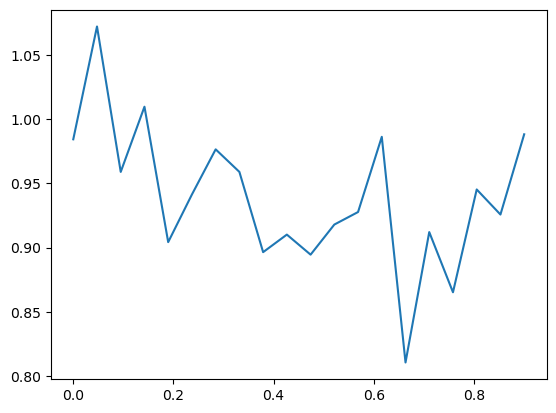

In [18]:
import matplotlib.pyplot as plt

#print(theta_opt)
f, df = func_and_deriv(x,num_qubits,l,theta_opt,shots_simulator)
plt.plot(x, f)
#plt.plot(x, df)

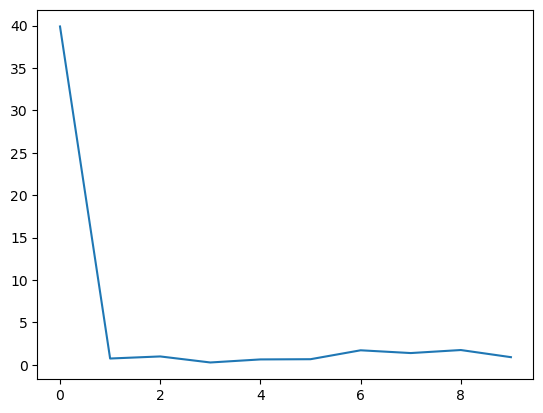

In [19]:
plt.plot(losses)